<p align="center">
  <img src="./img/ship.png" />
</p>

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./data/train.csv')

# **2. Bivariate analysis**
Bivariate analysis is used to understand the relationship between two columns in a dataset, and usually when one of the columns is the target column (Survived in the case of the titanic). By examining how each feature correlates with survival, you can identify patterns and insights that may not be obvious from the previopus univariate analysis.

## **2.1 Correlation numerical rows**
Firstly, we can find corrolation between columns and plot them into a heatmap:

<Axes: >

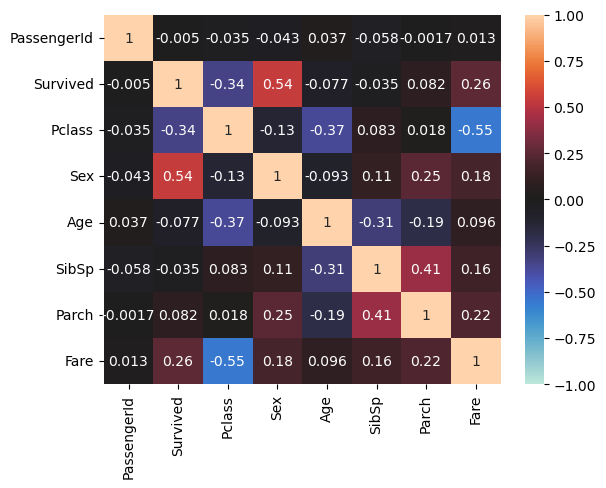

In [164]:
# Plot column correlation matrix
# Skip non-numeric columns
only_numeric = df

# Convert sex (male or female) to 0 or 1
only_numeric['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
only_numeric = df.select_dtypes(include=[int, float])

# Compute the correlation matrix
sns.heatmap(only_numeric.corr(), annot = True, vmin=-1, vmax=1, center= 0)

> Correlation of numerical values in the dataset. As we are interested we look at correlations with the **Survived** column (target)
> Shows correlation between fare and the class of the passenger  
> Shows correlation between passenger class and survival  
> Shows correlation between gender (Sex) and survival


## **2.2 Questions for analysis**
Using these correlations, we ask the following questions:
- Does the passenger class affect the survival of the passenger (Categorical vs Categorical)
- Is there a difference in male and female survival? (Categorical vs Categorical)
- Does age have an effect on survival? (Numerical vs Categorical)


### **2.2.1 Passenger class & Fare vs Survival (Categorical vs Categorical)**
![ship class distribution](./img/class-distribution-ship.png)
> Figure 1 (https://titanicll.wordpress.com/titanic-ii-cabins/)

On the Titanic, the class system played a significant role not just in the quality of accommodations but also in the passengers chances of survival. The ship was divided into three classes (First, second and third) based on economic status. (Distribution seen in figure 1). Due to the ship's layout and the evacuation procedures, passengers in higher classes had quicker and easier access to lifeboats. This is shown in the data as the survival rate was way lower for the lowest class

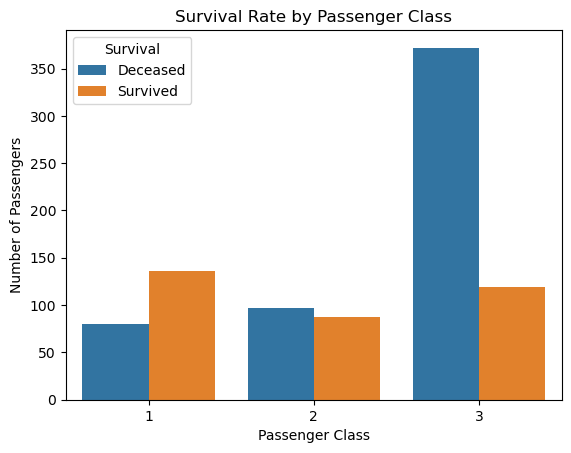

In [165]:
# Countplot of survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Deceased', 'Survived'], title='Survival')

plt.show()

> Count plot showing a resemblance between a higher class and surviving the disaster

### **2.2.2 Gender (Sex) Vs Survival (Categorical vs Categorical)**
The evacuation process followed a social normalized principle: "women and children first." This practice meant that when the limited number of lifeboats were being filled, women and children were given priority over men. This was common at the time, but this can be proven when plotting the data for gender against survival.

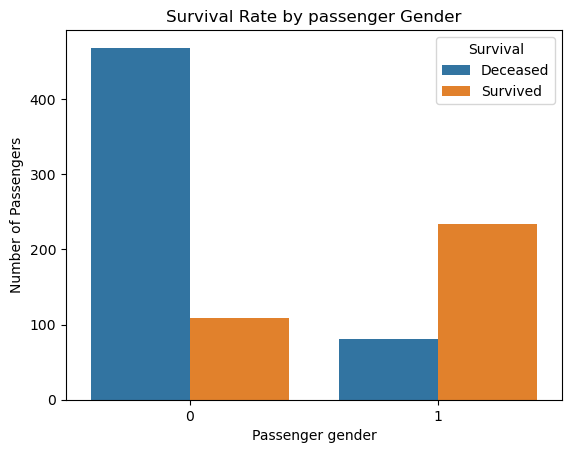

In [166]:
# Countplot of survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by passenger Gender')
plt.xlabel('Passenger gender')
plt.ylabel('Number of Passengers')
plt.legend(['Deceased', 'Survived'], title='Survival')

plt.show()

> Count plot showing a corrolation between being a woman and surviving the disaster

### **2.2.3 Age vs Survival (Numerical vs Categorical)**
As described above, women and children are given priority to life boats and should therefore be more likely to survive. But does this also check out when it comes to the data? To check this, i have made a swarmplot to show the distribution of deaths compared to the passengers age.

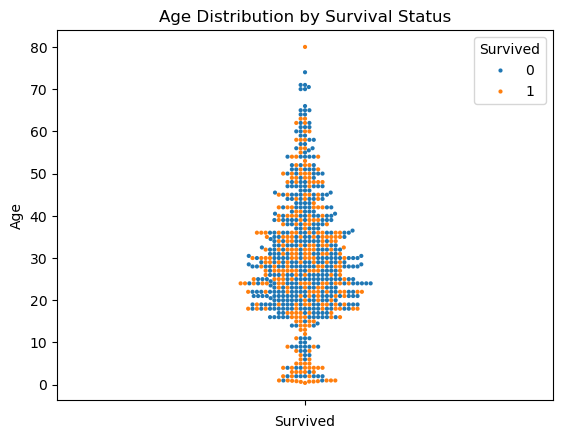

In [167]:
sns.swarmplot(hue='Survived', y='Age', data=df, size=3)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

> Plotting to show that the most casualties where in their 20's or 30's. There is very little dots of deceased children (blue dots) indicating that children were indeed more likely to survive (orange dots).

Because the above plot can be hard to read, i have also included a calculation of the percentage of survival by age group
- A child is < 18
- An adult is > 18

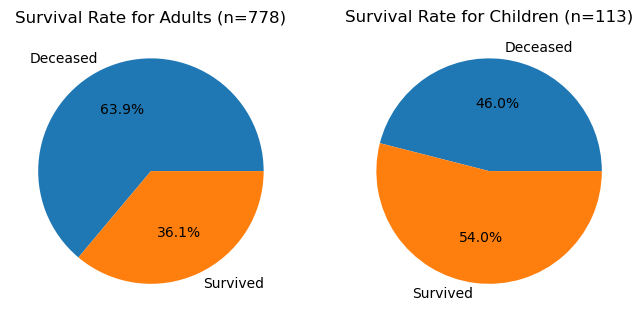

In [168]:
# Group the age by under 18 or over 18 to see if children were more likely to survive
df['Child'] = df['Age'] < 18

# Calculate the percentage of children and adults who survived
counts = df.groupby(['Child', 'Survived']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the survival rate of children and adults
fig, ax = plt.subplots(1, 2, figsize=(8, 7))

# Pie chart for adults
ax[0].pie(counts.loc[False], labels=['Deceased', 'Survived'], autopct='%1.1f%%')
ax[0].set_title(f'Survival Rate for Adults (n={len(df) - df["Child"].sum()})')

# Pie chart for children
ax[1].pie(counts.loc[True], labels=['Deceased', 'Survived'], autopct='%1.1f%%')
ax[1].set_title(f'Survival Rate for Children (n={df["Child"].sum()})')

plt.show()


> These plots show the survival rate for each age group.